## 3. Parsing Dates



#### Environment setup



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

DATA_URL = '/Users/dravik/Downloads/catalog.csv'

landslides = pd.read_csv(DATA_URL)

np.random.seed(0)

In [3]:
landslides


,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1688,7535,12/7/15,NaN,NaN,United States,US,North Carolina,1646,Tryon,7.80866,...,"(35.221899999999998, -82.322599999999994)",Landslide,Rockfall,Small,NaN,NaN,0.0,0.0,Tryon Daily Bulletin,http://www.tryondailybulletin.com/2016/02/26/u...
1689,7537,2/22/16,0:00,NaN,United States,US,West Virginia,51400,Charleston,6.84721,...,"(38.398699999999998, -81.584800000000001)",Landslide,Mudslide,Small,Unknown,NaN,0.0,0.0,Charleston Gazette,http://www.wvgazettemail.com/news/20160222/us-...
1690,7539,2/23/16,NaN,NaN,United States,US,West Virginia,2406,Welch,14.19735,...,"(37.409599999999998, -81.4268)",Landslide,Landslide,Small,Rain,NaN,0.0,0.0,Bluefield Daily Telegraph,http://www.bdtonline.com/news/officials-cautio...
1691,7540,2/26/16,21:06,NaN,United States,US,West Virginia,1048,Athens,12.00678,...,"(37.501100000000001, -81.109300000000005)",Landslide,Rockfall,Small,Unknown,NaN,0.0,0.0,Bluefield Daily Telegraph,http://www.bdtonline.com/news/rockslide-snarls...


In [17]:
landslides.isnull().sum()

id                         0
date                       3
time                    1064
continent_code          1529
country_name               0
country_code               0
state/province             1
population                 0
city/town                  4
distance                   1
location_description    1142
latitude                   1
longitude                  1
geolocation                1
hazard_type                0
landslide_type             1
landslide_size             1
trigger                    2
storm_name              1561
injuries                1178
fatalities               247
source_name              821
source_link              100
dtype: int64

In [18]:
landslides.head()


,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [19]:
print(landslides['date'].head())


0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


In [20]:
landslides.date.dtype

dtype('O')

In [24]:
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format='%m/%d/%y')
# landslides['date_parsed'] = pd.to_datetime(landslides['date'], format='%m/%d/%y', infer_datetime_format=True) # shouldn't be use always as it slows down the process
landslides.date_parsed

0      2007-03-02
1      2007-03-22
2      2007-04-06
3      2007-04-14
4      2007-04-15
          ...    
1688   2015-12-07
1689   2016-02-22
1690   2016-02-23
1691   2016-02-26
1692   2016-03-02
Name: date_parsed, Length: 1693, dtype: datetime64[ns]

In [28]:
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides

0        2.0
1       22.0
2        6.0
3       14.0
4       15.0
        ... 
1688     7.0
1689    22.0
1690    23.0
1691    26.0
1692     2.0
Name: date_parsed, Length: 1693, dtype: float64

#### **Plot the day of the month to check the date parsing**


In [29]:
day_of_month_landslides = day_of_month_landslides.dropna()


/Users/dravik/PycharmProjects/JupyterPycharm/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='date_parsed'>

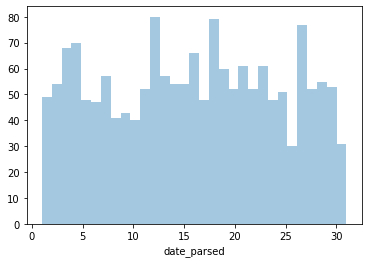

In [36]:
sns.distplot(day_of_month_landslides, kde=False, bins=31)

### Exercise: Parsing Dates


In [39]:
EARTHQUAKES = '/Users/dravik/Downloads/database.csv'

earthquakes = pd.read_csv(EARTHQUAKES)
earthquakes.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [41]:
#checking out the "Date" column type. Is it datetime or object type
earthquakes['Date'].dtype

dtype('O')

In [43]:
# there's an issue with consistency with date format
earthquakes[3378:3383]


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
3379,02/23/1975,03:53:36,-21.727,-71.356,Earthquake,33.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A0A,US,US,US,Reviewed
3380,02/23/1975,07:34:11,-10.879,166.667,Earthquake,33.0,NaN,NaN,5.5,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A0C,US,US,US,Reviewed
3381,02/25/1975,05:20:05,-7.388,149.798,Earthquake,33.0,NaN,NaN,5.5,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A12,US,US,US,Reviewed
3382,02/26/1975,04:48:55,85.047,97.969,Earthquake,33.0,NaN,NaN,5.6,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000A1H,US,US,US,Reviewed


In [47]:
date_lengths = earthquakes['Date'].str.len()
date_lengths.value_counts()

10    23409
24        3
Name: Date, dtype: int64

In [71]:
indices = np.where([date_lengths == 24])[1]
earthquakes.loc[indices]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,date_parsed
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed,1975-02-23 02:58:41+00:00
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed,1985-04-28 02:53:41.530000+00:00
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed,2011-03-13 02:23:34.520000+00:00


In [80]:
earthquakes.loc[3378, 'Date'] = '02/23/1975'
earthquakes.loc[7512, 'Date'] = '04/28/1985'
earthquakes.loc[20650, 'Date'] = '03/13/2011'
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format='%m/%d/%Y')
earthquakes['date_parsed']

AttributeError: 'Series' object has no attribute 'len'

/Users/dravik/PycharmProjects/JupyterPycharm/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='date_parsed'>

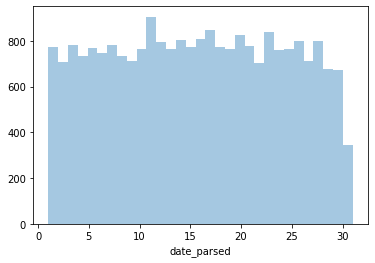

In [83]:
earthquakes['date_parsed'] = earthquakes['date_parsed'].dropna()
day_of_month_earthquakes = earthquakes['date_parsed'].dt.day

sns.distplot(day_of_month_earthquakes, kde=False, bins=31)

In [ ]:
#there are bonus challenges in this exercises